# Ensemble Methods

### Introduction to Ensemble Methods

**1) Explain how the random forest algorithm works. Why are random forests resilient to overfitting?**

_Hint: Your answer should discuss bagging and the subspace sampling method._

#### Answer: 
- Random forest algorithms work by combining multiple decision trees together and taking the average of all the predictions from each of the decision trees (the mean for a regressor and the mode for a classifier)
- They are resilient to overfitiing for two reasons: <br>
Bagging - The process of bootstrapping the data and training indiviual models on each re-sampled set of data creates models that will natuarlly vary from one another as the data they have been fitted to is varied in itself. The average of these models will be a more generalised prediction <br>
Subspace sampling - Limiting the number of variables that an internal node can use to split sample at that node in the tree and then randomising this across all of the internal nodes in all of the decision trees further increases the variabilty in each models predictions and in turn generalises the final prediction further still

### Random Forests and Hyperparameter Tuning using GridSearchCV

In this section, you will perform hyperparameter tuning for a Random Forest classifier using GridSearchCV. You will use `scikit-learn`'s wine dataset to classify wines into one of three different classes. 

After finding the best estimator, you will interpret the best model's feature importances. 

In the cells below, we have loaded the relevant imports and the wine data for you. 

In [1]:
# Relevant imports
import pandas as pd 

# Load the data 
df = pd.read_csv('titanic.csv')
df.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
X = df.drop(['Survived','Name'],axis=1)
y = df['Survived']

In [3]:
X = pd.get_dummies(X)

In the cells below, we inspect the first five rows of the dataframe and compute the dataframe's shape.

In [7]:
X.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


In [8]:
X.shape

(887, 7)

We also get descriptive statistics for the dataset features, and obtain the distribution of classes in the dataset. 

In [9]:
X.describe()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
count,887.000000,887.000000,887.000000,887.000000,887.00000,887.000000,887.000000
mean,2.305524,29.471443,0.525366,0.383315,32.30542,0.354002,0.645998
std,0.836662,14.121908,1.104669,0.807466,49.78204,0.478480,0.478480
min,1.000000,0.420000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.000000,20.250000,0.000000,0.000000,7.92500,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.45420,0.000000,1.000000
75%,3.000000,38.000000,1.000000,0.000000,31.13750,1.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.32920,1.000000,1.000000


In [10]:
y.value_counts().sort_index()

0    545
1    342
Name: Survived, dtype: int64

## Setting up our validation framework

### Split your data in Train and Test data
No validation dataset necessary as we will be performing K-fold crossvalidation

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Instantiate your k-fold object

In [19]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5, random_state=42)

You will now perform hyper-parameter tuning for a Random Forest classifier.

**2) Construct a `param_grid` dictionary to pass to `GridSearchCV` when instantiating the object. Choose at least 3 hyper-parameters to tune and 3 values for each.** 

In [26]:
# Replace None with relevant code 
param_grid = {'max_depth': [10,20,30], 
              'min_samples_leaf': [10,15,20], 
              'n_estimators': [3,6,9],
              'max_features': [3,4,5]
             }

Now that you have created the `param_grid` dictionary of hyperparameters, let's continue performing hyperparameter optimization of a Random Forest Classifier. 

In the cell below, we include the relevant imports for you.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

**3) Create an instance of a Random Forest Classifier estimator; call it `rfc`.** Make sure to set `random_state=42` for reproducibility. 

In [28]:
# Replace None with appropriate code
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

**4) Create an instance of an `GridSearchCV` object and fit it to the data.** Call the instance `cv_rfc`. 

* Use the random forest classification estimator you instantiated in the cell above, the parameter grid dictionary constructed, and make sure to perform 5-fold cross validation. 
* The fitting process should take 10 - 15 seconds to complete. 

In [32]:
# Replace None with appropriate code 
cv_rfc = GridSearchCV(rfc, param_grid, cv=skfold, scoring='roc_auc', n_jobs=-1) 

cv_rfc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=Fal

**5) What are the best training parameters found by GridSearchCV?** 

_Hint: Explore the documentation for GridSearchCV._ 

In [35]:
cv_rfc.best_params_

{'max_depth': 20, 'max_features': 3, 'min_samples_leaf': 10, 'n_estimators': 9}

In the cell below, we create a variable `best_model` that holds the best model found by the grid search.

In [36]:
best_model = cv_rfc.best_estimator_

Next, we give you a function that creates a horizontal bar plot to visualize the feature importances of a model, sorted in descending order. 

In [38]:
import matplotlib.pyplot as plt 
%matplotlib inline 

def create_plot_of_feature_importances(model, X):
    ''' 
    Inputs: 
    
    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''
    
    feat_importances = model.feature_importances_

    features_and_importances = zip(X.columns, feat_importances)
    features_and_importances = sorted(features_and_importances, 
                                     key = lambda x: x[1], reverse=True)
    
    features = [i[0] for i in features_and_importances]
    importances = [i[1] for i in features_and_importances]
    
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances)
    plt.gca().invert_yaxis()
    plt.title('Feature Importances')
    plt.xlabel('importance')

**6) Create a plot of the best model's feature importances.** 

_Hint: To create the plot, pass the appropriate parameters to the function above._

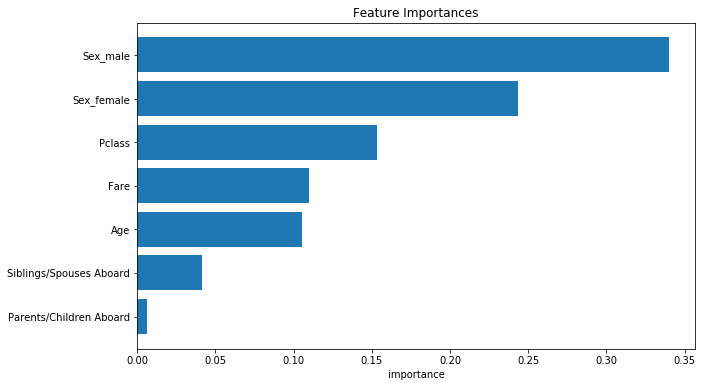

In [39]:
create_plot_of_feature_importances(best_model, X_train)

**7) What are this model's top 3 features in order of descending importance?**

In [42]:
# The top 3 features here are sex_male, sex_female, Pclass
# This tells us the passengers gender is the feature with the largest effect on whether or not a passneger survived
# and the class of their ticket the next. So rich women had much higher chances of survival than poor men for instance